In [12]:
import os
import torch
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import cm

DATE = '2020-07-28_Env_val'
EXP = 'evaluation_run5'
LOAD_DIR = Path('../saved_data') / DATE / EXP

plots = []
fig_count = 0

# load data of all samples
states = dict()
support_calc = dict()
configs = dict()
actions = dict()
for sample in next(os.walk(LOAD_DIR))[1]:
    states.update({sample: torch.load(LOAD_DIR / sample / 'batch_states')})
    support_calc.update({sample: torch.load(LOAD_DIR / sample / 'support_calc')})
    configs.update({sample: torch.load(LOAD_DIR / sample / 'config')})
    actions.update({sample: torch.load(LOAD_DIR / sample / 'batch_actions')})

# define action for all the run, which just can be taken from the last sample as a representative
act = np.array(actions[sample]['FSC']['Shell']).mean()
if act == 0.0:
    action = ' - action: all decrease'
elif act == 1.0:
    action = ' - action: all maintain'
elif act == 2.0:
    action = ' - action: all increase'
else:
    action = ' - action: all random'

# ax[0].elev --> 30 default, azim = -60 

<h2><center>plots for support of Gov and Shell - beta</center></h2>

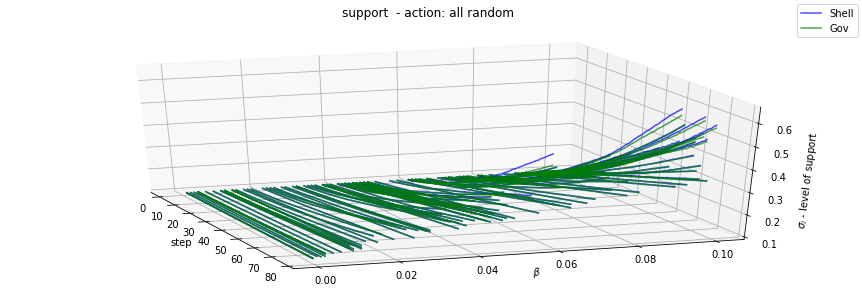

In [13]:
%matplotlib inline
# %matplotlib notebook
fig = plt.figure(fig_count, figsize=(12, 4))
plots.append(fig)
fig_count += 1

# create and set fig properties
c = ['b', 'g']
ax = fig.add_subplot(111, projection='3d')
fig.tight_layout()

for i, key in enumerate(['Shell', 'Gov']):
    flag = True
    for sample in next(os.walk(LOAD_DIR))[1]:
        x = range(0, states[sample][key].shape[1])
        mean = states[sample][key].mean(axis=0)[:, 0]
#         std  = states[sample][key].std(axis=0)[:, 0]
        val = configs[sample]['sub_lvl']*10
        if flag:
            ax.plot(x, mean, configs[sample]['beta_j'][key], zdir='y', c=c[i], label=key, alpha=0.7)
            flag = False
        ax.plot(x, mean, configs[sample]['beta_j'][key], zdir='y', c=c[i], alpha=0.7)
        ax.set_title('support ' + action)
        ax.set_xlabel('step')
        ax.set_ylabel(r'$\beta$')
        ax.set_zlabel(r'$\sigma_i$' + ' - level of support')
        ax.view_init(elev=30,azim=-20)
fig.legend()
# fig.tight_layout()
# fig.show()

<h2><center>plots for beta - sub_lvl dependency</center></h2>

In [ ]:
%matplotlib inline
# %matplotlib notebook
fig = plt.figure(fig_count, figsize=(12, 4))
plots.append(fig)
fig_count += 1

# create and set fig properties
cmap = cm.get_cmap('winter')
mappable = cm.ScalarMappable(cmap=cmap)
ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
fig.tight_layout()
fig.colorbar(mappable, label=r'$sub\_lvl$')

for i, key in enumerate(['Shell', 'Gov']):
    for sample in next(os.walk(LOAD_DIR))[1]:
        x = range(0, states[sample][key].shape[1])
        mean = states[sample][key].mean(axis=0)[:, 0]
#         std  = states[sample][key].std(axis=0)[:, 0]
        val = configs[sample]['sub_lvl']*10
        ax[i].plot(x, mean, configs[sample]['beta_j'][key], zdir='y', c=(cmap(val)[0], cmap(val)[1], cmap(val)[2]))
        ax[i].set_title('support ' + key + action)
        ax[i].set_xlabel('step')
        ax[i].set_ylabel(r'$\beta$')
        ax[i].set_zlabel(r'$\sigma_i$' + ' - level of support')
        ax[i].view_init(elev=30,azim=-30)
# fig.tight_layout()

<h2><center>plots for beta - delta_resource dependency</center></h2>


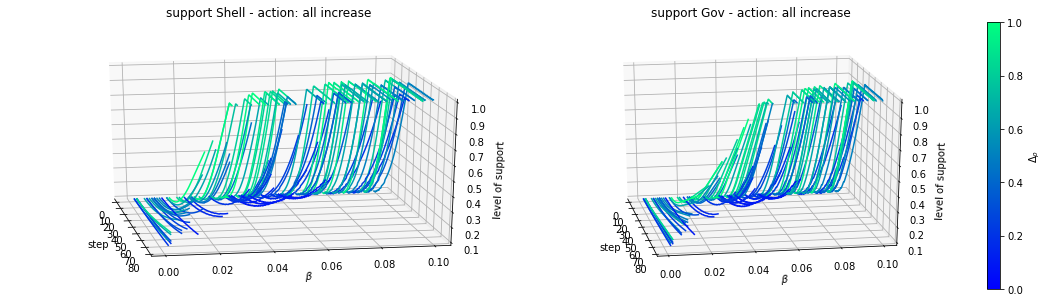

In [10]:
%matplotlib inline
# %matplotlib notebook
fig = plt.figure(fig_count, figsize=(15, 4))
plots.append(fig)
fig_count += 1

# create and set fig properties
cmap = cm.get_cmap('winter')
mappable = cm.ScalarMappable(cmap=cmap)
ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
fig.tight_layout()
fig.colorbar(mappable, label=r'$\Delta_{\rho}$')

for i, key in enumerate(['Shell', 'Gov']):
    for sample in next(os.walk(LOAD_DIR))[1]:
        x = range(0, states[sample][key].shape[1])
        mean = states[sample][key].mean(axis=0)[:, 0]
        val = configs[sample]['delta_resource']*50
        ax[i].plot(x, mean, configs[sample]['beta_j']['FSC'], zdir='y', c=((cmap(val)[0], cmap(val)[1], cmap(val)[2])))
        ax[i].set_title('support ' + key + action)
        ax[i].set_xlabel('step')
        ax[i].set_ylabel(r'$\beta$')
        ax[i].set_zlabel('level of support')
        ax[i].view_init(elev=20,azim=-10)
# fig.show()

<h2><center>plots for distribution of parameters</center></h2>

In [ ]:
%matplotlib inline

import seaborn as sns
import copy

fig = plt.figure(fig_count, figsize=(12, 4))
plots.append(fig)
fig_count += 1
ax = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)]
labels = [r'$\Delta_{\rho}$', r'$\beta$', r'$sub\_lvl$']
params = [[configs[sample]['delta_resource'] for sample in next(os.walk(LOAD_DIR))[1]],
          [configs[sample]['beta_j']['Shell'] for sample in next(os.walk(LOAD_DIR))[1]],
          [configs[sample]['sub_lvl'] for sample in next(os.walk(LOAD_DIR))[1]]]

for i in range(0, len(labels)):
    sns.distplot(params[i], bins=10, ax=ax[i], rug=True)
    ax[i].set_xlabel(labels[i])
fig.suptitle('kernel density estimation and histogram for {} samples'.format(len(params[2])) + action);

<h2><center>plots for action distribution (only for random action)</center></h2>

In [ ]:
# TODO: könnte auch ein 3D plot mit der distribution der action und abhängigkeit der beiden anderen Parameter sein

%matplotlib inline
# %matplotlib notebook
fig = plt.figure(fig_count, figsize=(12, 4))
plots.append(fig)
fig_count += 1

cmap = cm.get_cmap('winter')
mappable = cm.ScalarMappable(cmap=cmap)
ax = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)]
# fig.tight_layout()
fig.colorbar(mappable, label='final support level')

i = -1
for key in actions['sample_no0'].keys():
    for par_agt in actions['sample_no0'][key].keys():
        i += 1
        x = []
        y = []
        val = []
        for sample in next(os.walk(LOAD_DIR))[1]:
            # first state entry of FSC is the support level of Shell and Gov added together
            val.append(states[sample]['FSC'][:,77,0].mean() * 10) 
            x.append(configs[sample]['beta_j'][key])
            y.append(np.array(actions[sample][key][par_agt]).mean())
        ax[i].scatter(np.array(x), np.array(y), c=np.array(val), cmap=cmap)
        ax[i].set_xlabel(r'$\beta$')
        ax[i].set_ylabel('mean action')
        ax[i].set_title('action from ' + key + ' to ' + par_agt)
fig.tight_layout()

In [11]:
# plots[0].savefig((LOAD_DIR / (DATE + '_' + EXP + '_support_both_beta' + '.pdf')), bbox_inches="tight")
# plots[1].savefig((LOAD_DIR / (DATE + '_' + EXP + '_beta_sub_lvl' + '.pdf')), bbox_inches="tight")
plots[0].savefig((LOAD_DIR / (DATE + '_' + EXP + '_beta_delta_resource' + '.pdf')), bbox_inches="tight")
# plots[3].savefig((LOAD_DIR / (DATE + '_' + EXP + '_parameter_dist' + '.pdf')), bbox_inches="tight")
# plots[0].savefig((LOAD_DIR / (DATE + '_' + EXP + '_action_mean' + '.pdf')), bbox_inches="tight")

In [ ]:
plots